# 2.1 初めてのニューラルネットワーク

## mnistデータセットの読み込み

In [119]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [120]:
original_test_images = test_images
original_test_labels = test_labels

In [121]:
# .shape 配列のサイズ　定義してある配列が何行何列なのか
train_images.shape

(60000, 28, 28)

In [122]:
# データ数
len(train_images)

60000

In [123]:
# ラベル（1～9）
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

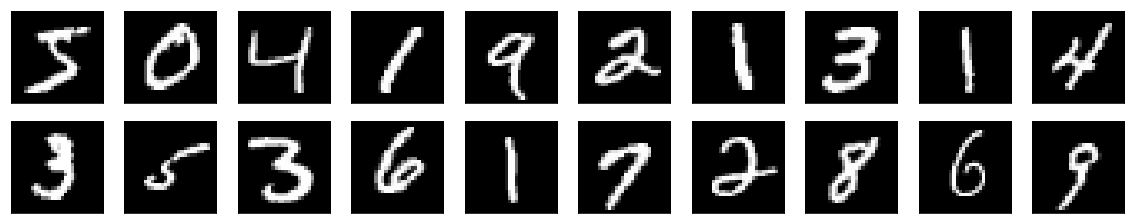

In [172]:
import matplotlib.pyplot as plt
#MNISTデータの表示(学習データの最初の100枚を表示）
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(train_images[i].reshape((28, 28)), cmap="gray")

## ニューラスネットワークのアーキテクチャ

In [125]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

このニューラルネットは、２つの密に結合された層（Dence）で構成されている。⇛全結合層

最後の層は10個のユニットからなるソフトマックス層であり、合計すると１になる10個の確率スコアを含む配列を返す。

ニューラルネットを訓練する準備を整えるには、コンパイルステップとして以下の要素を選択する必要がある。

①損失関数

訓練データでのネットワークの性能をどのように評価するのか、そしてネットワークを正しい方向にどのように向かわせるのかを決める手法

②オプティマイザ

与えられたデータを損失関数に基づいてネットワークが自身を更新するメカニズム

③訓練とテストを監視するための指標

ここでは正解率のみを考慮する

In [126]:
# コンパイルステップ
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

画像データの前処理として、データの形状を変換する。具体的には、すべての値を0,1の区間に収まるようスケーリングする。

今回使用するデータは型がunit8、形状が(60000,28,28)の配列に格納されている。この配列には0,255の区間の値が格納されている。

このデータを型がfloat32、形状が(60000, 28*28)で0~1の値が含まれた配列に変換する。

In [128]:
# 画像データの準備
train_images = train_images.reshape((60000, 28*28, ))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28, ))
test_images = test_images.astype('float32') / 255

In [130]:
# ラベルをカテゴリ値でエンコード
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [131]:
# 適合
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.2555 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.1030 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0682 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.0498 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0369 - acc: 0.9889


In [132]:
# 正解率
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 1s 75us/step
0.9795


In [177]:
## 結果の確認
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np

# テストデータで予測
predicted_classes = network.predict_classes(test_images)
pred = np.equal(predicted_classes, original_test_labels)

# 誤答
mispred = np.where(pred == False)

# 正解
corpred = np.where(pred == True)

In [138]:
# 混同行列を表示
print(sklearn.metrics.confusion_matrix(original_test_labels, predicted_classes))

[[ 968    0    1    1    0    0    4    2    4    0]
 [   0 1125    4    0    0    1    2    0    3    0]
 [   1    1 1011    3    1    0    3    7    5    0]
 [   0    0    6  997    0    0    0    4    3    0]
 [   2    0    1    1  960    0    4    6    1    7]
 [   2    0    0   15    0  866    2    1    5    1]
 [   3    3    0    1    1    3  945    0    2    0]
 [   0    6    7    1    0    0    0 1013    1    0]
 [   2    0    4    4    4    2    2    5  948    3]
 [   3    6    0   10   11    1    1   14    1  962]]


結果概要を確認するために混同行列を表示する。縦の列が本来の値で、横の行がニューラルネットによる推測値である。対角線上の値が正解数を意味する。
6, 8, 9などの丸を含む数字は苦手？、という印象。

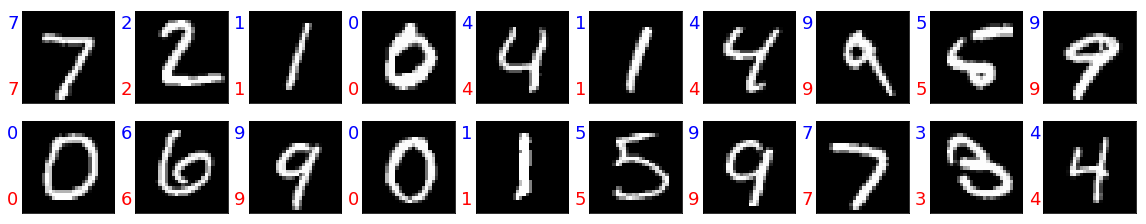

In [178]:
# 予測に成功したテストデータを表示。青字が正答、赤字が予測値
j = 0
plt.figure(figsize=(20, 20))

for i in corpred[0][0:20]:
    j += 1
    plt.subplot(10, 10, j, xticks=[], yticks=[])
    #plt.imshow(original_test_images[i], cmap=plt.cm.binary)
    plt.imshow(original_test_images[i],cmap="gray")
    plt.text(-5, 5, original_test_labels[i], color="blue", fontsize=18)
    plt.text(-5, 25, predicted_classes[i], color="red", fontsize=18)

plt.show()

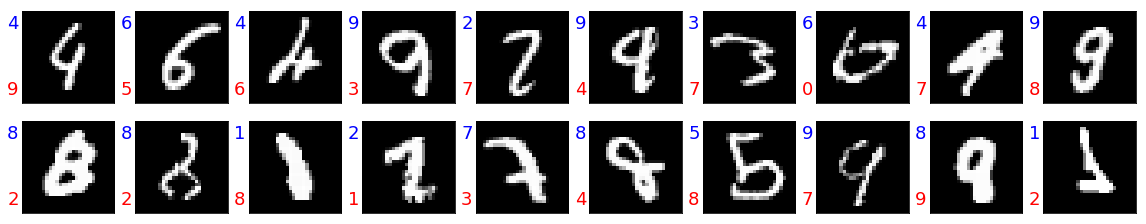

In [176]:
# 予測に失敗したテストデータを表示。青字が正答、赤字が予測値（誤答）
j = 0
plt.figure(figsize=(20, 20))

for i in mispred[0][0:20]:
    j += 1
    plt.subplot(10, 10, j, xticks=[], yticks=[])
    #plt.imshow(original_test_images[i], cmap=plt.cm.binary)
    plt.imshow(original_test_images[i],cmap="gray")
    plt.text(-5, 5, original_test_labels[i], color="blue", fontsize=18)
    plt.text(-5, 25, predicted_classes[i], color="red", fontsize=18)

plt.show()

In [179]:
# 間違えた画像（保存）
import os
IMAGE_PATH = 'error-images'
if not os.path.exists(IMAGE_PATH):
    os.mkdir(IMAGE_PATH)

import numpy as np

# Write error images
for i, (p, y) in enumerate(zip(predictions, test_labels_bk)):
    if p != y:
        image = test_images_bk[i]*127.5 + 127.5 # [-1,1] --> [0,255]
        img = Image.fromarray(image.reshape((image.shape[0], image.shape[1])).astype(np.uint8))
        img.save(IMAGE_PATH+"/{0}-c{1}-p{2}.png".format(i, y, p)) # c=correct, p=predict